In [13]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/electric-vhicule-population-data/Electric_Vehicle_Population_Data.csv


**Kullandığım veri seti, Washington Eyalet Lisanslama Dairesinde kayıtlı olan Pil Elektrikli Araçları ve Şarj Edilebilir Hibrit Elektrikli Araçları göstermektedir.**

In [14]:
import pandas as pd

# Kaggle dataset dosya yolunu belirt
df = pd.read_csv('/kaggle/input/electric-vhicule-population-data/Electric_Vehicle_Population_Data.csv')

# İlk birkaç satıra göz at
df.head()



,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,JTMAB3FV3P,Kitsap,Seabeck,WA,98380.0,2023,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42.0,0.0,35.0,240684006,POINT (-122.8728334 47.5798304),PUGET SOUND ENERGY INC,5.303509e+10
1,1N4AZ1CP6J,Kitsap,Bremerton,WA,98312.0,2018,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,151.0,0.0,35.0,474183811,POINT (-122.6961203 47.5759584),PUGET SOUND ENERGY INC,5.303508e+10
2,5YJ3E1EA4L,King,Seattle,WA,98101.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,266.0,0.0,43.0,113120017,POINT (-122.3340795 47.6099315),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,1N4AZ0CP8E,King,Seattle,WA,98125.0,2014,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84.0,0.0,46.0,108188713,POINT (-122.304356 47.715668),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
4,1G1FX6S00H,Thurston,Yelm,WA,98597.0,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238.0,0.0,20.0,176448940,POINT (-122.5715761 46.9095798),PUGET SOUND ENERGY INC,5.306701e+10


**Veri setinin yüklemek için pandas kütüphanesini kullandım ve birkaç satıra gözattım.**

In [8]:
df = pd.read_csv('/kaggle/input/electric-vhicule-population-data/Electric_Vehicle_Population_Data.csv')

**Kullandığım veri setini NaN değerleri çekmek için 'df' değişkeni içine atadım**

In [9]:
# Tüm NaN değerleri bulma
nan_values = df.isnull()
print(nan_values)

        VIN (1-10)  County   City  State  Postal Code  Model Year   Make  \
0            False   False  False  False        False       False  False   
1            False   False  False  False        False       False  False   
2            False   False  False  False        False       False  False   
3            False   False  False  False        False       False  False   
4            False   False  False  False        False       False  False   
...            ...     ...    ...    ...          ...         ...    ...   
205434       False   False  False  False        False       False  False   
205435       False   False  False  False        False       False  False   
205436       False   False  False  False        False       False  False   
205437       False   False  False  False        False       False  False   
205438       False   False  False  False        False       False  False   

        Model  Electric Vehicle Type  \
0       False                  False   
1      

**NaN değerlerini say**

In [10]:
print(df.isnull().sum())

VIN (1-10)                                             0
County                                                 3
City                                                   3
State                                                  0
Postal Code                                            3
Model Year                                             0
Make                                                   0
Model                                                  1
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         8
Base MSRP                                              8
Legislative District                                 442
DOL Vehicle ID                                         0
Vehicle Location                                       8
Electric Utility                                       3
2020 Census Tract                                      3
dtype: int64


**Veri seti içindeki NaN değerleri buldum**

In [11]:
# Veri seti hakkında genel bilgi
df.info()

# Temel istatistiksel özet
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205439 entries, 0 to 205438
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         205439 non-null  object 
 1   County                                             205436 non-null  object 
 2   City                                               205436 non-null  object 
 3   State                                              205439 non-null  object 
 4   Postal Code                                        205436 non-null  float64
 5   Model Year                                         205439 non-null  int64  
 6   Make                                               205439 non-null  object 
 7   Model                                              205438 non-null  object 
 8   Electric Vehicle Type                              205439 non-null  object

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,205436.000000,205439.000000,205431.000000,205431.000000,204997.000000,2.054390e+05,2.054360e+05
mean,98177.971870,2020.960363,52.164342,922.670532,28.970848,2.277156e+08,5.297704e+10
std,2419.037479,2.989059,88.075859,7761.753602,14.910052,7.205737e+07,1.588435e+09
min,1731.000000,1997.000000,0.000000,0.000000,1.000000,4.469000e+03,1.001020e+09
25%,98052.000000,2019.000000,0.000000,0.000000,17.000000,1.935324e+08,5.303301e+10
50%,98125.000000,2022.000000,0.000000,0.000000,33.000000,2.382368e+08,5.303303e+10
75%,98372.000000,2023.000000,48.000000,0.000000,42.000000,2.618718e+08,5.305307e+10
max,99577.000000,2025.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.602100e+10


***EDA Keşifsel Veri Analizi
**Veri setinin genel yapısını ve istatistiksel özetini anlamak için info() ve describe() fonksiyonlarını kullandım**

In [31]:
most_common_makes = df['Make'].value_counts().head(10)  # En çok kullanılan ilk 10 markayı bul

print(most_common_makes)

Make
TESLA         90318
CHEVROLET     15114
NISSAN        14525
FORD          10840
KIA            9104
BMW            8481
TOYOTA         7945
HYUNDAI        5782
RIVIAN         5679
VOLKSWAGEN     5638
Name: count, dtype: int64


**En çok kullanılan ilk 10 marka**

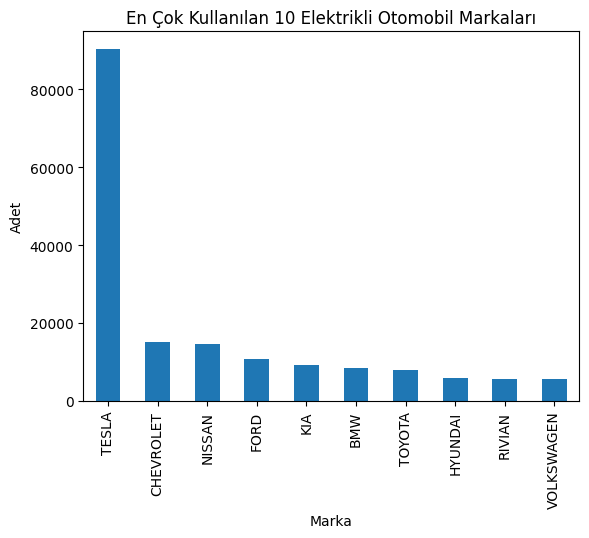

In [32]:
import matplotlib.pyplot as plt

most_common_makes.plot(kind='bar')
plt.title('En Çok Kullanılan 10 Elektrikli Otomobil Markaları')
plt.xlabel('Marka')
plt.ylabel('Adet')
plt.show()

**En çok kullanılan markaların grafiği**

In [29]:
most_common_models = df['Model'].value_counts().head(10)  # En çok kullanılan ilk 10 modeli bul

print(most_common_models)


Model
MODEL Y           43437
MODEL 3           32113
LEAF              13488
MODEL S            7881
BOLT EV            6727
MODEL X            6249
VOLT               4829
ID.4               4564
MUSTANG MACH-E     4154
WRANGLER           4047
Name: count, dtype: int64


**En çok kullanılan 10 modeli sıraladım**

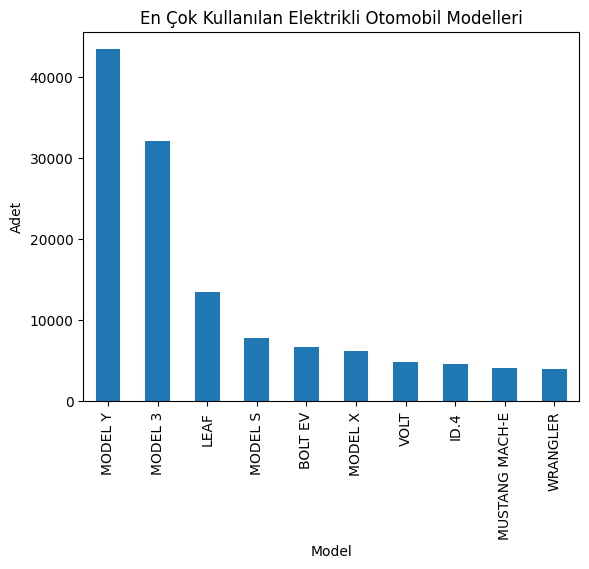

In [30]:
import matplotlib.pyplot as plt

most_common_models.plot(kind='bar')
plt.title('En Çok Kullanılan 10 Elektrikli Otomobil Modelleri')
plt.xlabel('Model')
plt.ylabel('Adet')
plt.show()


**Ve hemen altına modellerin grafiğini oluşturdum**

**PROJE SONU SONUÇ YORUMLAMA**

**Tesla'nın Öncü Rolü**

Tesla'nın liderliği: Tesla'nın 90.318 araçla diğer markaları büyük bir farkla geride bırakması, şirketin elektrikli araç pazarındaki güçlü liderliğini açıkça gösteriyor. Bu, Tesla'nın yenilikçi teknolojisi, güçlü marka algısı ve genişleyen şarj altyapısı sayesinde pazarın önemli bir kısmını kontrol ettiğini ortaya koyuyor.

Pazar trendi: Tesla'nın bu hakimiyeti, diğer markaların elektrikli araç pazarına giriş stratejilerini ve pazarda rekabetçi kalmak için yapacakları teknolojik yatırımları etkileyebilir.

**Tesla kalitesi**

1. Öncü Teknoloji ve İnovasyon

Batarya Teknolojisi; Tesla, elektrikli araç sektöründe batarya teknolojisi alanında öncüdür. Daha uzun menzil, hızlı şarj süreleri ve daha düşük enerji maliyetleri sunan lityum iyon batarya sistemleri, Tesla'nın diğer markalardan öne çıkmasını sağlamıştır.

2. Otonom Sürüş Yetenekleri

Tesla'nın gelişmiş otonom sürüş özellikleri, araçlarının yüksek teknolojili ve geleceğe dönük algılanmasını sağlar. Bu da teknolojiye meraklı ve yenilikleri benimseyen tüketicilerin Tesla'ya yönelmesine neden olur.

4. Marka İmajı ve Algı

Tesla, kurucusu Elon Musk'ın vizyonu ve şirketin pazarlama stratejileri sayesinde yenilikçi, çevre dostu ve prestijli bir marka olarak algılanıyor. Bu da markanın geniş bir müşteri kitlesine hitap etmesine olanak tanıyor.

5. Sadık Müşteri Kitlesi

Tesla, teknoloji ve sürdürülebilirlik odaklı tüketiciler arasında güçlü bir sadakat oluşturmuştur. Bu, müşterilerin markaya tekrar geri dönmesini ve yeni alıcıların markayı tercih etmesini sağlıyor.

5. Şarj Altyapısı

Supercharger Ağı Tesla'nın küresel çapta genişleyen Supercharger ağı, araç sahiplerine hızlı ve güvenilir şarj imkanı sunar. Bu altyapı, Tesla'nın diğer markalara göre daha fazla tercih edilmesinin önemli nedenlerinden biridir. Kullanıcılar, uzun yolculuklarda bile rahatça şarj imkanı bulabileceklerini bildikleri için Tesla araçlarını tercih ederler.

6. Yüksek Performans ve Tasarım

Performans Odaklı Modeller; Tesla, Model S, Model 3, Model X ve Model Y gibi farklı modellerde yüksek performans ve hızlı ivmelenme özellikleri sunar. Bu, araçların sportif ve konforlu sürüş deneyimi arayan kullanıcılar tarafından tercih edilmesine neden olur.

7. Modern ve Minimalist Tasarım

Tesla araçları, modern ve minimalist iç/dış tasarımıyla dikkat çeker. Araç içi teknoloji ve büyük dokunmatik ekranlar, kullanıcı deneyimini iyileştirir ve yenilikçi bir hava katar.

8. Çevre Dostu Olma ve Sürdürülebilirlik

Elektrikli Araçların Popülaritesi: Elektrikli araçların karbon ayak izini azaltma konusundaki avantajları, sürdürülebilirlik odaklı tüketicileri Tesla gibi markalara yönlendirmektedir. Tesla'nın yenilenebilir enerji kaynaklarına olan yatırımları ve çevreye duyarlılığı, markayı daha çekici kılar.

10. Yüksek Teknoloji Entegrasyonu

Sürekli Yazılım Güncellemeleri; Tesla araçları, düzenli yazılım güncellemeleri alarak yeni özellikler ve geliştirmeler sunar. Bu da araçların zamanla daha iyi hale gelmesini sağlar ve teknoloji meraklıları için büyük bir avantajdır.

**Rekabetçi Markalar**

Chevrolet ve Nissan'ın varlığı: Chevrolet ve Nissan gibi markaların sırasıyla 15.114 ve 14.525 araçla Tesla'nın ardından gelmesi, bu markaların fiyat performans ve ulaşılabilirlik açısından tercih edilen seçenekler olduğunu gösteriyor. Bu, uygun fiyatlı elektrikli araçların geniş kitleler tarafından benimsendiğini ve pazarın sadece premium segmente ait olmadığını gösterir.

Ford, Kia ve BMW'nin nispeten yüksek rakamları, bu markaların sektörde büyüme potansiyeline sahip olduğunu ve elektrikli araç rekabetine yatırım yaptıklarını gösterir.

**Asya Markalarının Yükselişi**

Kia, Toyota ve Hyundai: Bu markaların sıralamadaki varlığı, Asya menşeli üreticilerin de elektrikli araç piyasasında büyüyen bir paya sahip olduğunu yansıtıyor. Bu, özellikle gelecekte düşük maliyetli ve teknolojik olarak gelişmiş araçların pazarın çeşitliliğini artırabileceğini gösterir.

**Niş Oyuncular ve Yenilikler**

Rivian ve Volkswagen: Rivian gibi daha yeni markaların ve Volkswagen gibi köklü şirketlerin pazarda yer bulması, elektrikli araç endüstrisinde çeşitliliğin arttığını ve pazarın yalnızca birkaç büyük oyuncuya bağımlı olmadığını gösterir. Bu, sektörün yenilikçiliğe açık olduğunu ve yeni şirketlerin rekabet edebilir durumda olduğunu ortaya koyar.

**Sektörel İhtiyaçlar ve Trendler**

Şarj İstasyonu İhtiyacı: En çok kullanılan markaların analizinden, bu markaların güçlü olduğu bölgelerde şarj istasyonu altyapısına olan ihtiyacın daha fazla olacağını söyleyebiliriz. Örneğin, Tesla'nın öncülüğü nedeniyle Tesla Supercharger ağının genişletilmesi gerekebilir.

Regülasyonlar ve Teşvikler: Elektrikli araçların yaygınlaşması, hükümetlerin karbon emisyonlarını azaltmaya yönelik politikalarının etkili olduğunu ve bu politikalara daha fazla teşvik eklenmesinin önemli olabileceğini gösterir.

Tüketici Eğilimleri: Bu sonuçlar, tüketicilerin tercihlerini ve marka sadakatini belirlemek için kullanılabilir. Örneğin, Tesla'nın yüksek popülaritesi, potansiyel müşterilere yönelik pazarlama kampanyalarının Tesla gibi teknoloji odaklı ve yenilikçi özelliklere vurgu yapmasını gerektirebilir.